9. Un-Supervised Learning Algorithms - Hierarchical Clustering: Using any dataset
implement Hierarchical Clustering (AGNES and DIANA). Plot the Dendrogram for
Hierarchical Clustering and analyze your result. Plot the clustering output for the same dataset
using these two hierarchical techniques. Compare the results. Write the inference.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

In [3]:
# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_std = StandardScaler().fit_transform(X)

In [4]:
# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

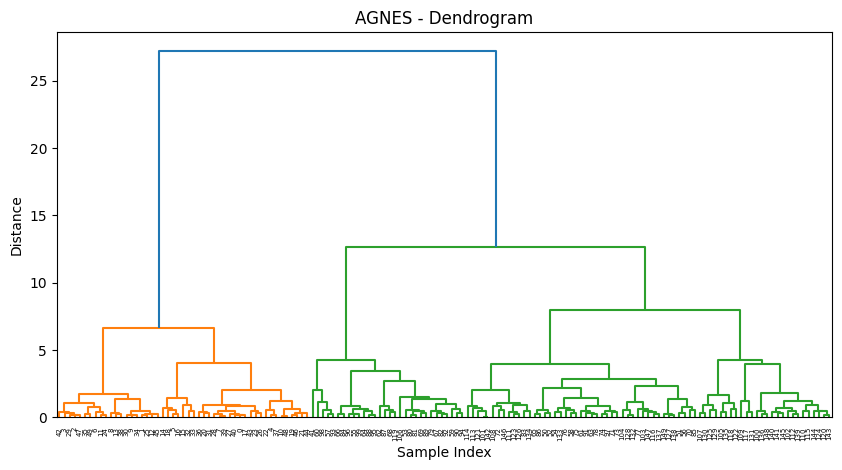

In [5]:

# --- AGNES (Agglomerative) ---
agnes_linkage = linkage(X_std, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(agnes_linkage)
plt.title("AGNES - Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# AGNES clustering
agnes_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
agnes_labels = agnes_cluster.fit_predict(X_std)

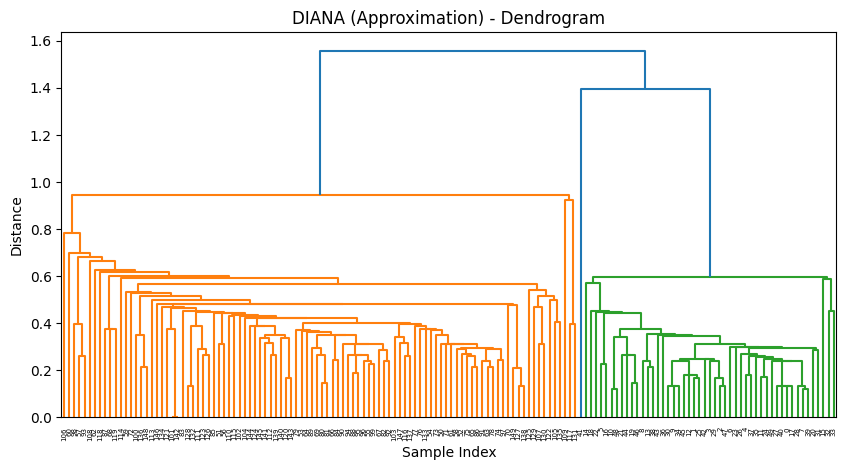

In [6]:
# --- DIANA Approximation (Divisive using sklearn.tree for simulation) ---
# Sklearn does not support DIANA directly.
# We'll use scipy with 'single' linkage as an approximation of top-down.
diana_linkage = linkage(X_std, method='single')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(diana_linkage)
plt.title("DIANA (Approximation) - Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# DIANA clustering (approx)
diana_cluster = AgglomerativeClustering(n_clusters=3, linkage='single')
diana_labels = diana_cluster.fit_predict(X_std)


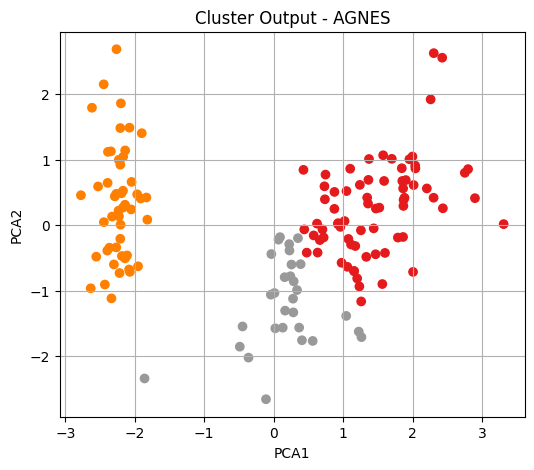

In [7]:
# --- Plot Cluster Outputs ---

# AGNES plot
plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agnes_labels, cmap='Set1')
plt.title("Cluster Output - AGNES")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.grid(True)
plt.show()

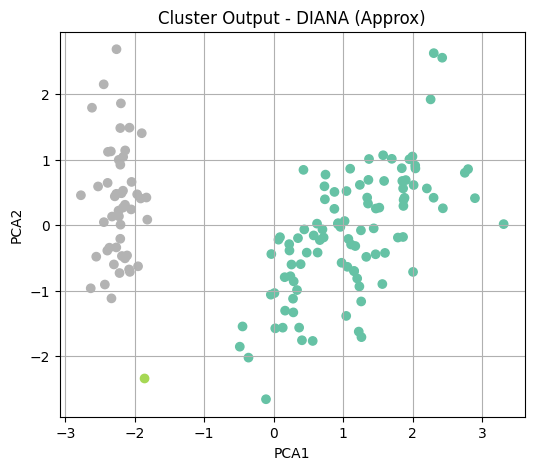

In [8]:

# DIANA plot
plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=diana_labels, cmap='Set2')
plt.title("Cluster Output - DIANA (Approx)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.grid(True)
plt.show()
